<a href="https://colab.research.google.com/github/hamzaodeh/DLI/blob/main/3_model_training_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git config --global user.email "odehhamza8@gmail.com"
!git config --global user.name "hamzaodeh"

!git clone https://github.com/hamzaodeh/DLI
%cd DLI

Cloning into 'DLI'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 8.30 KiB | 2.08 MiB/s, done.
/content/DLI


In [3]:
# --- Commit 1: Built and compiled model ---



# 1. Setup

import numpy as np

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping



# 2. Data Loading

X_train = np.load("data/X_train.npy")

y_train = np.load("data/y_train.npy")

X_test = np.load("data/X_test.npy")

y_test = np.load("data/y_test.npy")



# 3. Model Architecture (LSTM + Embedding)

model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=64))  # Removed deprecated input_length

model.add(LSTM(64, return_sequences=False))

model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))



# 4. Compile the Model

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



# 5. Force Build the Model to View Summary Early

model.build(input_shape=(None, 200))  # Matches padded input size

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# --- Commit 2: Trained model and saved weights ---

# 5. Training
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# 6. Save Model
# Create results directory if it doesn't exist

import os

os.makedirs("results", exist_ok=True)

# Save training history as JSON

import json
with open("results/training_history.json", "w") as f:
    json.dump(history.history, f)
print("Training history saved.")


Epoch 1/3
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 164s 128ms/step - accuracy: 0.9965 - loss: 0.0127 - val_accuracy: 0.9798 - val_loss: 0.0733
Epoch 2/3
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 204s 129ms/step - accuracy: 0.9978 - loss: 0.0093 - val_accuracy: 0.9804 - val_loss: 0.0737
Epoch 3/3
1282/1282 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.9971 - loss: 0.0093 - val_accuracy: 0.9814 - val_loss: 0.0852
Training history saved.


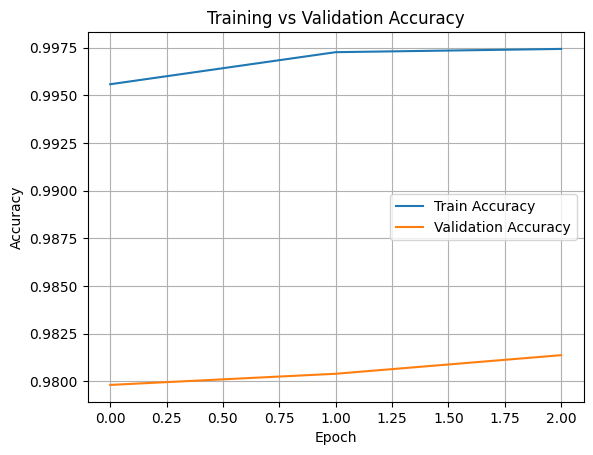

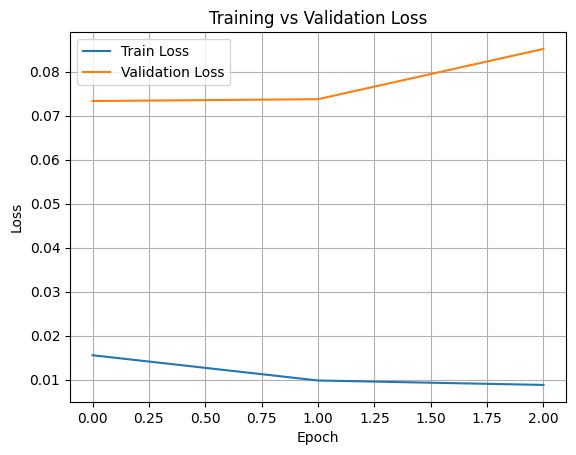

In [6]:
# --- Commit 3: Plotted training accuracy and loss ---

# 7. Plot Training History
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

os.makedirs("results", exist_ok=True)
plt.savefig("results/training_accuracy.png")
plt.show()

# Optional: Plot loss too
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig("results/training_loss.png")
plt.show()